# <center>Methods of Applied Mathematics Team Project

## 네이버 검색어 키워드를 통한 테마주 네트워크 구성

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
from scipy import spatial
import matplotlib.pyplot as plt
from antQuant.utils import DataManager
from jupyterthemes import jtplot
jtplot.style(theme='grade3')
%matplotlib inline

## 네이버 검색어 트렌드 데이터 읽기

In [3]:
def process_data(data):
    data.index = pd.to_datetime(data.index, format='%Y-%m-%d')
    # Re setting the columns and fill the NaN Values with zero.
    try:
        data = data[['문재인테마주','홍준표테마주','안철수테마주','유승민테마주','안희정테마주']].fillna(0)
    except:
        data = data[['문재인정책주','홍준표정책주','안철수정책주','유승민정책주','안희정정책주']].fillna(0)
    
    return data

In [4]:
theme_data = process_data(pd.read_csv('thema.csv', index_col=['날짜']))
theme_data.head()

,문재인테마주,홍준표테마주,안철수테마주,유승민테마주,안희정테마주
날짜,,,,,
2016-11-01,8.30785,0.01559,2.28052,1.72833,1.75017
2016-11-02,7.69014,0.02183,2.77344,1.27597,1.81256
2016-11-03,6.98508,0.05615,2.08398,0.98271,1.76577
2016-11-04,9.52143,0.28389,1.93423,0.54595,2.32732
2016-11-05,4.93854,0.17158,1.42883,0.26829,1.64722


In [5]:
policy_data = process_data(pd.read_csv('policy.csv', index_col=['날짜']))
policy_data.head()

,문재인정책주,홍준표정책주,안철수정책주,유승민정책주,안희정정책주
날짜,,,,,
2016-11-01,6.59484,0.22853,0.26118,0.19588,0.16323
2016-11-02,6.13777,0.81619,0.19588,0.19588,0.29382
2016-11-03,6.07247,0.16323,0.29382,0.39177,0.88148
2016-11-04,5.45217,0.26118,0.39177,0.16323,0.58765
2016-11-05,3.59125,0.19588,0.22853,0.16323,0.45706


## KRX 거래 주식 전종목 종가 데이터 읽어오기

In [6]:
close = pd.read_csv('C:\\Data\\Abnormal Price Separated Table.csv',index_col = ['Date'])
close.index = pd.to_datetime(close.index, format = '%Y-%m-%d')
close.tail()

,A000010,A000020,A000030,A000040,A000050,A000070,A000100,A000110,A000150,A000180,...,A900270_1,A900270_2,A900280_1,A900280_2,A950010_1,A950010_2,A950030_1,A950030_2,A950070_1,A950070_2
Date,,,,,,,,,,,,,,,,,,,,,
2017-07-10,NaN,8100,18900.0,1050,16700,117500,246500,NaN,121000,3030,...,NaN,2760.0,NaN,3970.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-11,NaN,8180,18800.0,1050,16500,114000,246000,NaN,121000,3030,...,NaN,2775.0,NaN,3965.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-12,NaN,8140,18350.0,923,16300,113000,247500,NaN,120500,3010,...,NaN,2765.0,NaN,3970.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-13,NaN,8040,18400.0,917,16150,111500,246000,NaN,121500,3025,...,NaN,2750.0,NaN,3940.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-14,NaN,7850,18600.0,885,16300,113000,248500,NaN,118000,2990,...,NaN,2650.0,NaN,3880.0,NaN,NaN,NaN,NaN,NaN,NaN


### 박근혜 대통령 탄핵 심판이 시작된 16년 12월 9일 부터 대선 전날인 17년 5월 9일 까지의 데이터 slicing

In [7]:
theme_data = theme_data['2016-12-09':'2017-05-09'].T
policy_data = policy_data['2016-12-09':'2017-05-09'].T

In [8]:
stock_data = close['2016-12-09':'2017-05-09'].T # 2017년 1분기 차트로 확인하기, 계산의 편의를 위해 Transpose
stock_data = stock_data.dropna()
stock_data.tail()

Date,2016-12-09 00:00:00,2016-12-12 00:00:00,2016-12-13 00:00:00,2016-12-14 00:00:00,2016-12-15 00:00:00,2016-12-16 00:00:00,2016-12-19 00:00:00,2016-12-20 00:00:00,2016-12-21 00:00:00,2016-12-22 00:00:00,...,2017-04-20 00:00:00,2017-04-21 00:00:00,2017-04-24 00:00:00,2017-04-25 00:00:00,2017-04-26 00:00:00,2017-04-27 00:00:00,2017-04-28 00:00:00,2017-05-02 00:00:00,2017-05-04 00:00:00,2017-05-08 00:00:00
A239610_2,22900.0,23500.0,23850.0,23750.0,23750.0,27450.0,28700.0,27450.0,26950.0,26850.0,...,24350.0,24800.0,23900.0,23500.0,23450.0,23100.0,23200.0,23250.0,23350.0,25100.0
A900050_3,1295.0,1330.0,1410.0,1385.0,1390.0,1345.0,1305.0,1285.0,1255.0,1270.0,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
A900100_2,2660.0,2750.0,2810.0,2860.0,3050.0,3025.0,2910.0,2935.0,2920.0,2920.0,...,2735.0,2845.0,3020.0,3040.0,3010.0,2910.0,2860.0,2900.0,2905.0,2895.0
A900270_2,2920.0,2925.0,2915.0,3005.0,3030.0,3000.0,2960.0,2955.0,2935.0,2950.0,...,2880.0,2885.0,2895.0,2950.0,3075.0,2965.0,3015.0,3035.0,3035.0,3180.0
A900280_2,6550.0,6510.0,6240.0,6490.0,6780.0,6950.0,7090.0,6900.0,6570.0,6610.0,...,4265.0,4260.0,4260.0,4245.0,4345.0,4330.0,4365.0,4315.0,4360.0,4400.0


두 데이터셋의 인덱스 맞추기
- 검색어 데이터에서 휴장일 제외 (추후 개선 필요)

In [9]:
theme_data = theme_data[stock_data.T.index]
policy_data = policy_data[stock_data.T.index]
print(theme_data.shape)
print(policy_data.shape)
print(stock_data.shape)

(5, 100)
(5, 100)
(2302, 100)


In [10]:
# min_max scale 함수
def get_minmax_scale(series):
    return (series-series.min())/(series.max()-series.min())

In [11]:
stock_data = stock_data.apply(get_minmax_scale, axis=1) # 종가 테이블의 최대,최소를 1,0 으로 통일(Normalizing)
stock_data.T.head()

,A000020,A000030,A000040,A000050,A000070,A000100,A000150,A000180,A000210,A000220,...,A214430_2,A214680_2,A220100_2,A220260_2,A225060_2,A239610_2,A900050_3,A900100_2,A900270_2,A900280_2
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-09,0.000000,0.218750,0.275229,0.883117,0.811321,0.039239,0.675926,0.514286,0.427083,0.186207,...,0.359223,0.836257,0.493878,0.344595,0.280639,0.144330,0.670455,0.017621,0.404762,0.813793
2016-12-12,0.103627,0.296875,0.376147,0.883117,0.754717,0.047717,0.791667,0.542857,0.562500,0.386207,...,0.480583,1.000000,0.718367,0.364865,0.243339,0.206186,0.750000,0.096916,0.409524,0.800000
2016-12-13,0.145078,0.203125,0.513761,0.857143,0.773585,0.242673,0.652778,0.685714,0.656250,0.565517,...,0.495146,0.883041,0.877551,0.425676,0.238011,0.242268,0.931818,0.149780,0.400000,0.706897
2016-12-14,0.186528,0.218750,0.545872,0.844156,0.773585,0.183327,0.745370,0.657143,0.520833,0.627586,...,0.509709,0.643275,0.959184,0.439189,0.250444,0.231959,0.875000,0.193833,0.485714,0.793103
2016-12-15,0.207254,0.250000,0.688073,0.935065,0.792453,0.225717,0.791667,0.785714,0.510417,0.703448,...,0.538835,0.666667,1.000000,0.466216,0.170515,0.231959,0.886364,0.361233,0.509524,0.893103


In [12]:
theme_data = theme_data.apply(get_minmax_scale, axis=1) # 종가 테이블의 최대,최소를 1,0 으로 통일(Normalizing)
theme_data.T.head()

,문재인테마주,홍준표테마주,안철수테마주,유승민테마주,안희정테마주
날짜,,,,,
2016-12-09,0.280148,0.093851,0.056918,0.061681,0.020535
2016-12-12,0.163735,0.124920,0.037625,0.047850,0.062217
2016-12-13,0.105821,0.186740,0.030697,0.125234,0.049682
2016-12-14,0.050044,0.107943,0.032509,0.030653,0.027822
2016-12-15,0.037832,0.504805,0.016308,0.022056,0.066905


In [13]:
policy_data = policy_data.apply(get_minmax_scale, axis=1) # 종가 테이블의 최대,최소를 1,0 으로 통일(Normalizing)
policy_data.T.head()

,문재인정책주,홍준표정책주,안철수정책주,유승민정책주,안희정정책주
날짜,,,,,
2016-12-09,0.178304,NaN,0.007050,0.263147,0.079710
2016-12-12,0.205736,NaN,0.022326,1.000000,0.068840
2016-12-13,0.165212,NaN,0.005875,0.315783,0.072463
2016-12-14,0.066708,NaN,0.010575,0.315783,0.108695
2016-12-15,0.059850,NaN,0.023502,0.789473,0.065216


홍준표 정책주는 데이터가 없음 -> Grouping 에서 제외

### Function : get_cos_similar()

cosine_similarity measure 를 통해 시계열 데이터 간의 유사도 측정, 상위 4개의 그래프 plot <br>
유사도 값 기준으로 상위 10개의 종목코드 반환

In [14]:
def get_cos_similar(target_data, compare_data) :    
    cos_similar = pd.Series()
    for i in compare_data.index :
           cos_similar = cos_similar.append(pd.Series(1 - spatial.distance.cosine(target_data, compare_data.loc[i])
                                                      , index = [i]))
    cos_similar = cos_similar.sort_values(ascending=False)
    print(cos_similar[:10]) # cosine 유사도 상위 10 종목 출력
    plt.figure(figsize=(12,7))
    plt.plot(target_data, label = 'Target Chart')
    plt.plot(stock_data.loc[cos_similar.index[0]], label = 'Most Similar Chart')
    plt.plot(stock_data.loc[cos_similar.index[1]], label = 'Second Similar Chart')
    plt.plot(stock_data.loc[cos_similar.index[2]], label = 'Third Similar Chart')
    plt.plot(stock_data.loc[cos_similar.index[3]], label = 'Fourth Similar Chart')
    plt.legend()
    plt.show()
    return cos_similar

A042500      0.917810
A048830      0.881940
A053800_2    0.872310
A049480      0.825307
A218150      0.814460
A025560      0.791209
A004770      0.779416
A100030      0.768063
A123410      0.764718
A005960_2    0.757900
dtype: float64


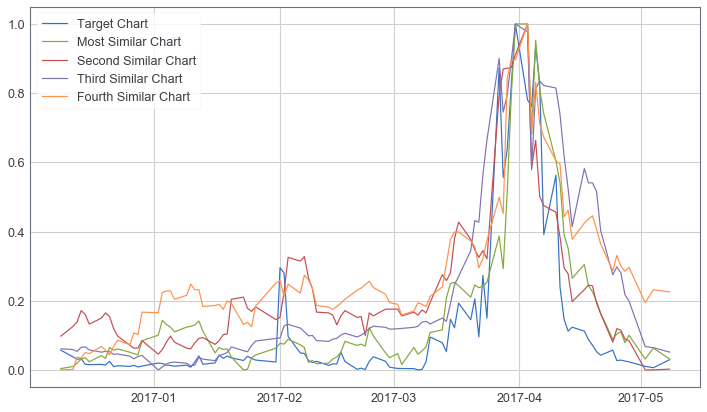

In [15]:
target_data = theme_data.loc['안철수테마주']
cos_similar = get_cos_similar(target_data, stock_data)

A042500      0.917810 링네트 -> 안철수 테마주 <br>
A048830      0.881940 엔피케이 -> 안철수 테마주 <br>
A053800      0.872310 안랩 -> 안철수 테마주 <br>
A049480      0.825307 오픈베이스 -> 안철수 테마주 <br>
A218150      0.814460 미래생명자원 -> 안철수 테마주 <br>
A025560      0.791209 미래 산업 -> 안철수 테마주 <br>
A004770      0.779416 써니전자 -> 안철수 테마주 <br>
A100030      0.768063 모바일리더 <br>
A123410      0.764718 코리아에프티 <br>
A005960      0.757900 동부건설

상위7 종목 안철수 테마주 확인

### Make a list for 안철수 테마주

In [15]:
Ahn_1 = ['042500','048830','053800','049480','218150','025560','004770']

테마주 관계 확인 캡쳐 사진들 (스크린샷 찍어서 넣은거라 깃헙에는 아마 안나올듯 합니다)

<img src = "https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/5bd5c8feb6d180302f33944d/65b94f2ede976aaa6ee4e10d23e390da/image.png">

<img src = "https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/5bd5c8feb6d180302f33944d/f7a8d852ec00b7abf9ce18383e567c3d/image.png">

053800 : 안랩 -> 안철수 테마주

<img src = "https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/5bd5c8feb6d180302f33944d/783d13f77ab437c66eb771ee0be26f79/upload_10/28/2018_at_11_35_27_PM.png">

<img src = "https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/5bd5c8feb6d180302f33944d/5bd6ad54924a52efefb7c508127bb579/image.png">

<img src = "https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/5bd5c8feb6d180302f33944d/e3c29c335c6b66c362f2355074f9b4d4/image.png">

<img src = "https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/5bd5c8feb6d180302f33944d/e725df938a58a680e82fe9da7e7eb760/image.png">

A115500      0.817147
A102120      0.791965
A009270      0.788031
A008350_2    0.787669
A123570      0.786248
A155660_2    0.786153
A065650      0.784668
A106080_2    0.775917
A042110_2    0.773395
A096630      0.772476
dtype: float64


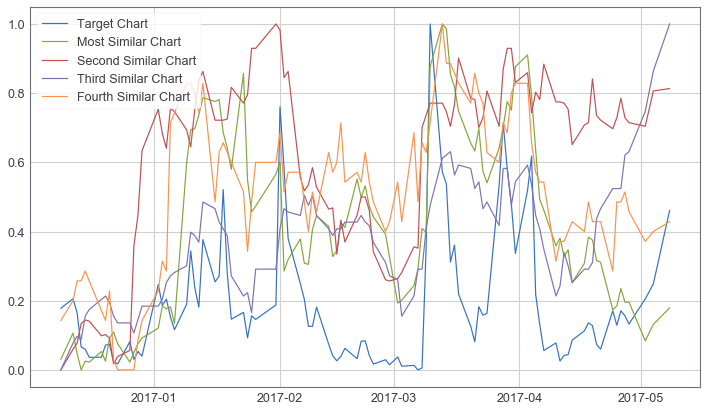

In [17]:
target_data = policy_data.loc['문재인정책주']
cos_similar = get_cos_similar(target_data, stock_data)

A115500      0.817147 케이씨에스 -> 대북 정책(철도 사업 관련) 관련 주 <br>
A102120      0.791965 어보브반도체 -> 4차산업혁명 관련 문재인 정책주 <br>
A009270      0.788031  x <br>
A008350_2    0.787669  x <br>
A123570      0.786248 이엠넷 -> 광고회사 조기 대선 기대감으로 상승 <br>
A155660_2    0.786153 DSR -> 문재인 테마주 (사장이 고교동문) <br>
A065650      0.784668 메디프론 -> 문재인 공약 1호 '치매 국가책임제' 관련 정책주 <br>
A106080_2    0.775917 x <br>
A042110_2    0.773395 에스씨디 -> 공기청정관련 정책주 <br>
A096630      0.772476 에스코넥 -> VR 관련 정책주 <br>

In [18]:
# moon = ['115500','102120','155660','065650','042110','096630']

<img src = "https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/5bd5c8feb6d180302f33944d/b624d9d48142e67c62c28ba17ec5e7c4/image.png">

A155660_2    0.721217
A069730      0.699255
A115500      0.698217
A006060      0.692151
A119850      0.692062
A002140      0.685821
A102120      0.683969
A123570      0.683872
A035890      0.681154
A039560      0.679657
dtype: float64


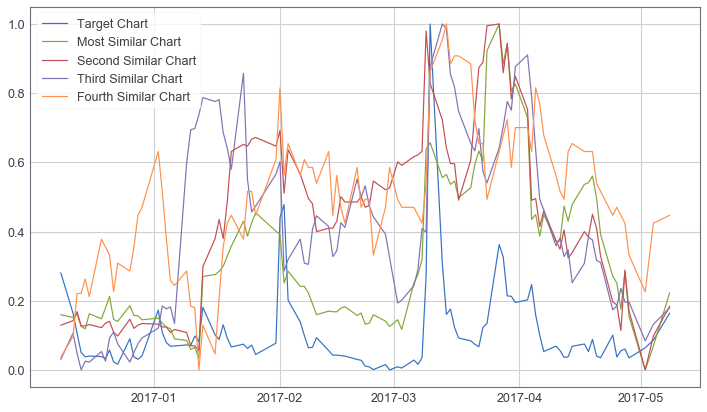

In [19]:
target_data = theme_data.loc['문재인테마주']
cos_similar = get_cos_similar(target_data, stock_data)

A155660_2    0.721217 DSR -> 문재인 테마주 <br>
A069730      0.699255 DSR 제강 -> 문재인 테마주 <br>
A115500      0.698217 케이씨에스 -> 문재인 테마주 <br>
A006060      0.692151 화승인더 -> 관련 없음<br>
A119850      0.692062 지엔씨에너지 -> 문재인 테마주 <br>
A002140      0.685821 고려산업 -> 문재인 테마주 <br>
A102120      0.683969 어보브반도체 -> 문재인 테마주? 약간 애매함 <br>
A123570      0.683872 이엠넷(이건 그냥 대선호재라 오름) <br>
A035890      0.681154 서희건설 -> 문재인 테마주 <br>
A039560      0.679657 다산네트워크 -> 문재인 테마주 <br>

In [235]:
Moon = ['115500','102120','155660','065650','042110','096630','069730','119850','002140','035890','039560']

<img src = "https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/5bd5c8feb6d180302f33944d/b4ce2e133a8e19bc2e193fb97ad8e978/image.png">

<img src = "https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/5bd5c8feb6d180302f33944d/76d7060aa8c955c4796fa90d90bcb761/image.png">

<img src = "https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/5bd5c8feb6d180302f33944d/dcbb32000f14c334522445b83fe288a7/image.png">

<img src = "https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/5bd5c8feb6d180302f33944d/39d4b25e7b244ee8c0f71bafd57195db/image.png">

<img src = "https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/5bd5c8feb6d180302f33944d/88ada43a3ae833f876d07d8d0f217391/image.png">

<img src = "https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/5bd5c8feb6d180302f33944d/279ed2c2a6685fdcefd74868bd2bb9fe/image.png">

<img src = "https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/5bd5c8feb6d180302f33944d/20bb686c9f0932e19fea75cfaf2aeda8/image.png">

A047080      0.582135
A036420_2    0.574382
A089790      0.566113
A096350      0.563095
A073190      0.558975
A078350      0.545088
A004990      0.544675
A500012      0.542306
A171010      0.540701
A000660      0.538867
dtype: float64


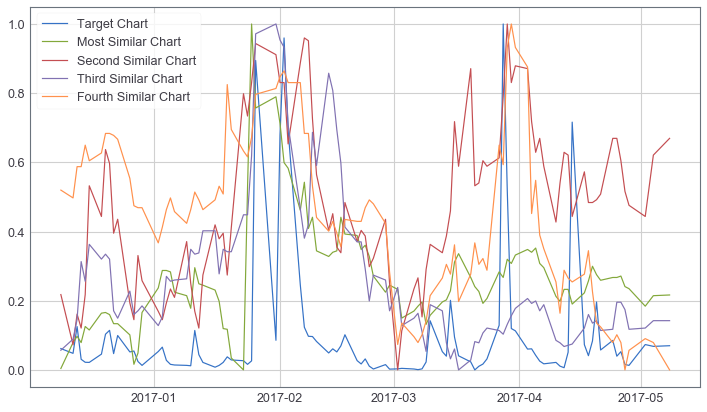

In [21]:
target_data = theme_data.loc['유승민테마주']
cos_similar = get_cos_similar(target_data, stock_data)

A047080      0.582135	한빛소프트 <br>
A036420_2    0.574382	제이콘텐트리<br>
A089790      0.566113	제이티<br>
A096350      0.563095	대창솔루션<br>
A073190      0.558975	디비케이<br>
A078350      0.545088	한양디지텍	<br>
A004990      0.544675	롯데지주<br>
A500012      0.542306	신한 인버스 달러인덱스 선물 ETN<br>
A171010      0.540701	램테크놀러지<br>
A000660      0.538867	SK 하이닉스<br>

유승민 테마주는 매치되는 종목이 없었습니다. pip 알고리즘 등으로 전처리 후 다시 돌려 볼 계획 입니다.

A034590      0.742909
A140910      0.690377
A015590      0.662575
A082640      0.661649
A224060      0.644844
A043710_4    0.637820
A050320_2    0.633574
A049830      0.629886
A066910      0.615118
A000390      0.614298
dtype: float64


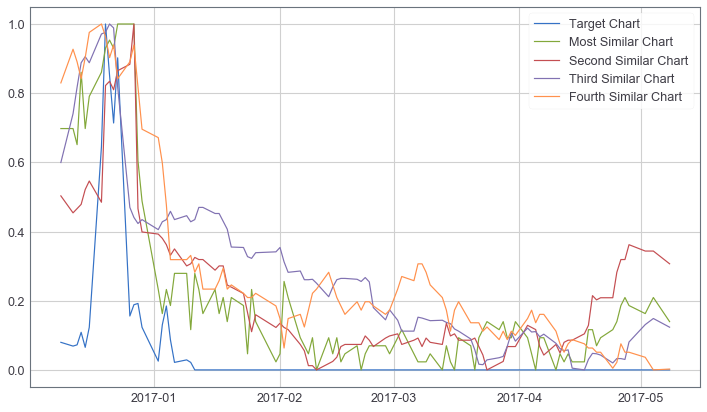

In [22]:
target_data = policy_data.loc['안희정정책주']
cos_similar = get_cos_similar(target_data, stock_data)

A034590      0.742909 <br>
A140910      0.690377<br>
A015590      0.662575<br>
A082640      0.661649<br>
A224060      0.644844 코디엠 -> 테마주<br>
A043710_4    0.637820 <br>
A050320_2    0.633574<br>
A049830      0.629886 반기문 테마주?<br>
A066910      0.615118 <br>
A000390      0.614298<br>

A003310      0.841026
A013720      0.819993
A088290_3    0.806134
A054410      0.804743
A017250      0.786235
A217270      0.784086
A000950      0.779859
A046310      0.778880
A036120      0.778236
A089790      0.771010
dtype: float64


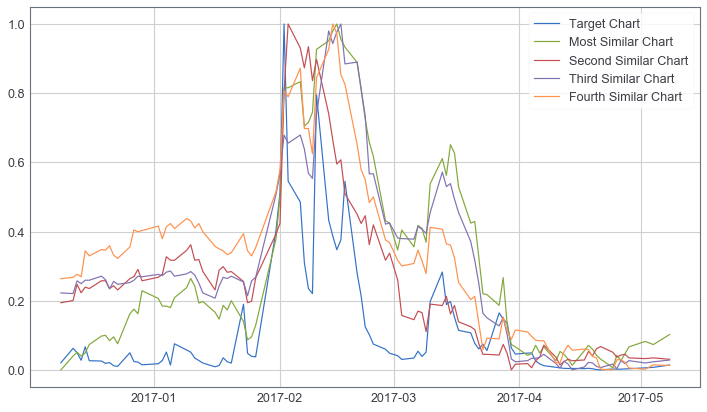

In [23]:
target_data = theme_data.loc['안희정테마주']
cos_similar = get_cos_similar(target_data, stock_data)

A003310      0.841026	대주산업 -> 안희정 테마주 <br>
A013720      0.819993	청보산업 -> 안희정 테마주 <br>
A088290_3    0.806133	이원컴포텍 -> 안희정 테마주 <br>
A054410      0.804743	케이피티 -> 안희정 테마주 <br>
A017250      0.786235	인터엠 -> 황교안 테마주 <br>
A217270      0.784086	넵튠 -> 얘는 아님 <br>
A000950      0.779859	전방	-> 관련 없음<br>
A046310      0.778880	백금T&A -> 안희정 테마주 <br>
A036120      0.778236	SCI평가정보 -> 안희정 테마주 <br>
A089790      0.771010	제이티 -> 황교안 테마주 <br>

황교안 후보와 같이 지지율이 올랐던 적이 있어서 황교안 테마주로 분류된 종목들이 몇개 나옴을 확인했습니다.

In [236]:
# Make 안희정관련주 list
Ahn_2 = ['224060','003310','013720','088290','054410','046310','036120']

### PIP Algorithm

In [17]:
from fastpip import pip

In [36]:
def get_pips(series, point_number):
    series.index = range(len(series.index))
    conversion_list = series.reset_index().values.tolist()
    pip_list = pip(conversion_list, point_number)
    pip_series = pd.Series(index = series.index)
    for i in pip_list:
        pip_series[(int(i[0]))] = i[1]
    
    return pip_series.interpolate() # interpolate() 메서드를 통해 NaN 값 제거, defalut = linear interpolation

In [34]:
pip_stock_data = stock_data.apply(get_pips, axis = 1, args = (10,)) # 여기서는 important points 를 10개 뽑는 걸로 실험

In [35]:
pip_stock_data.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
A000020,0.000000,0.019286,0.038572,0.057858,0.077145,0.096431,0.115717,0.135003,0.154289,0.173575,...,0.909326,0.896373,0.883420,0.870466,0.857513,0.844560,0.831606,0.818653,0.901554,0.984456
A000030,0.218750,0.222656,0.226562,0.230469,0.234375,0.238281,0.242188,0.246094,0.250000,0.253906,...,0.671875,0.708333,0.744792,0.781250,0.817708,0.854167,0.890625,0.927083,0.963542,1.000000
A000040,0.275229,0.378440,0.481651,0.584862,0.688073,0.689450,0.690826,0.692202,0.693578,0.694954,...,0.114679,0.098296,0.081913,0.065531,0.049148,0.032765,0.016383,0.000000,0.066514,0.133028
A000050,0.883117,0.906494,0.929870,0.953247,0.976623,1.000000,0.940260,0.880519,0.820779,0.761039,...,0.370130,0.367965,0.365801,0.363636,0.361472,0.359307,0.357143,0.354978,0.352814,0.350649
A000070,0.811321,0.811321,0.811321,0.811321,0.811321,0.811321,0.811321,0.811321,0.811321,0.811321,...,0.926415,0.928302,0.930189,0.932075,0.933962,0.935849,0.937736,0.939623,0.941509,0.943396


In [41]:
def get_pip_cos_similar(target_data, compare_data) :    
    cos_similar = pd.Series()
    for i in compare_data.index :
           cos_similar = cos_similar.append(pd.Series(1 - spatial.distance.cosine(target_data, compare_data.loc[i]), index = [i]))
    cos_similar = cos_similar.sort_values(ascending=False)
    print(cos_similar[:10]) # cosine 유사도 상위 10 종목 출력
    plt.figure(figsize=(12,7))
    plt.plot(target_data, label = 'Target Chart')
    plt.plot(pip_stock_data.loc[cos_similar.index[0]], label = 'Most Similar Chart')
    plt.plot(pip_stock_data.loc[cos_similar.index[1]], label = 'Second Similar Chart')
    plt.plot(pip_stock_data.loc[cos_similar.index[2]], label = 'Third Similar Chart')
    plt.plot(pip_stock_data.loc[cos_similar.index[3]], label = 'Fourth Similar Chart')
    plt.legend()
    plt.show()
    return cos_similar

A053800_2    0.928978
A042500      0.928696
A218150      0.885121
A048830      0.867836
A049480      0.848947
A254120      0.831627
A123410      0.825422
A108860      0.812711
A060280      0.812552
A215380      0.805484
dtype: float64


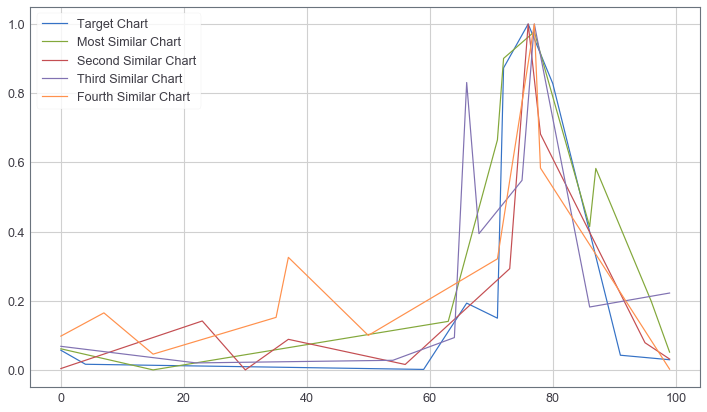

In [58]:
target_data = theme_data.loc['안철수테마주']
target_data = get_pips(target_data,10)
cos_similar = get_pip_cos_similar(target_data, pip_stock_data)

A176950      0.811714
A058400      0.799618
A121800_2    0.791845
A033230      0.781594
A001230      0.779858
A000890      0.779739
A054340      0.777650
A027970      0.777204
A006660      0.776194
A155660_2    0.775052
dtype: float64


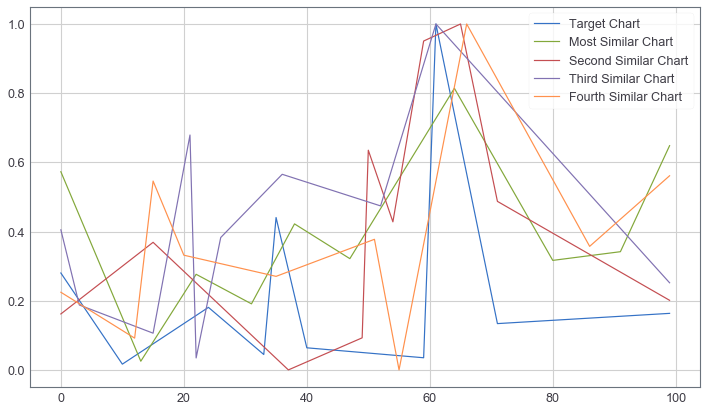

In [57]:
target_data = theme_data.loc['문재인테마주']
target_data = get_pips(target_data,10)
cos_similar = get_pip_cos_similar(target_data, pip_stock_data)

A113810      0.856561
A013720      0.855220
A000950      0.851191
A036120      0.835288
A054410      0.822066
A088290_3    0.809276
A900100_2    0.806441
A003310      0.802197
A089790      0.798775
A073570      0.798563
dtype: float64


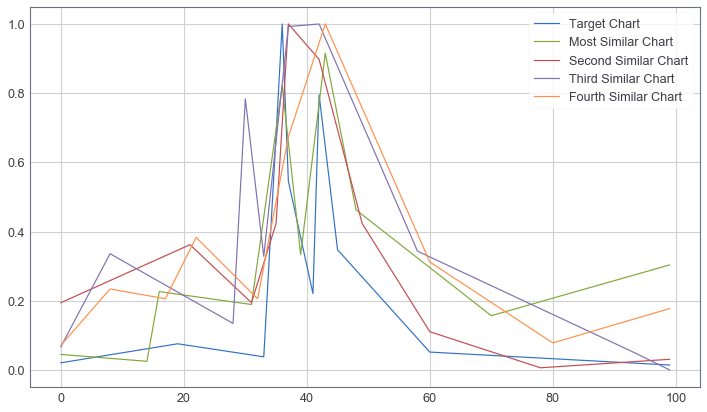

In [44]:
target_data = theme_data.loc['안희정테마주']
target_data = get_pips(target_data,10)
cos_similar = get_pip_cos_similar(target_data, pip_stock_data)

### MST Tutorial

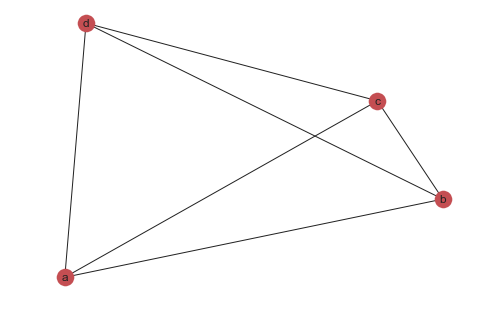

In [25]:
G = nx.Graph()
G.add_edge('a', 'b',weight=5)
G.add_edge('a','c',weight=3)
G.add_edge('a','d',weight=1)
G.add_edge('b','c',weight=15)
G.add_edge('b','d',weight=3)
G.add_edge('c','d',weight=8)
nx.draw(G,with_labels=True)

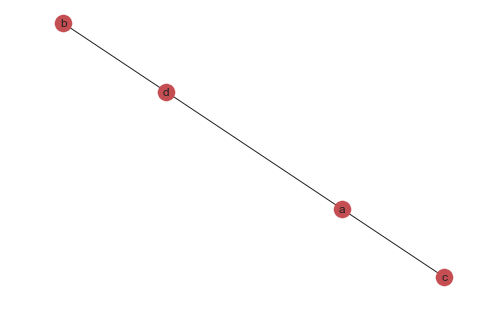

In [26]:
G_mst = nx.algorithms.tree.mst.minimum_spanning_tree(G)
nx.draw(G_mst,with_labels=True)

In [27]:
edges = list(G_mst.edges)
edges[0]

('a', 'd')

In [28]:
cost = 0
for i in edges:
    cost += G_mst.edges[i]['weight']
cost

7

In [29]:
G.nodes['a']['data'] = [1,2,3]
G.nodes['a']['data']

[1, 2, 3]

In [30]:
list(G.nodes)

['a', 'b', 'c', 'd']

### 후보별 테마주 네트워크 구성

In [65]:
from itertools import combinations
import datetime
db = DataManager()
idx = db.get_daily_ohlcv('005930')
time_period = idx['2016-06-09':'2018-04-01'].index

In [213]:
class construct_network:
    
    def __init__(self,period,stock_list,stock_data):
        self.period = period
        self.stock_list = stock_list
        self.stock_data = stock_data
        self.stock_data = self.stock_data.set_index(['date','code']).unstack()
        self.stock_data = self.stock_data['close']
        self.portfolio = self.get_portfolio(self.period)
        self.cost = pd.Series(self.period).apply(lambda x : self.get_cost(x)) / (len(self.stock_list) - 1)
        self.cost.index = self.period
        self.plot_things()        
    
    def get_portfolio(self,period):
        stock_data = self.stock_data[period[0]:period[-1]]
        return stock_data.apply(lambda x : x/x.iloc[0], axis=0).sum(axis=1)/len(self.stock_data.columns)
        
    def get_cost(self,date):
        period=100
        start_date = date + datetime.timedelta(days=-period)
        G = nx.Graph()
        G.add_nodes_from(self.stock_list)
        for i in list(G.nodes):
            G.nodes[i]['data'] = get_minmax_scale(self.stock_data[i][start_date:date]).fillna(0)

        iter_list = combinations(list(G.nodes),2)
        for i in iter_list:
            d1 = G.nodes[i[0]]['data']
            d2 = G.nodes[i[1]]['data']
            sim = 1 - spatial.distance.cosine(d1, d2)
            G.add_edge(i[0],i[1],weight=sim)


        G_mst = nx.algorithms.tree.mst.minimum_spanning_tree(G)
        

        edges = list(G_mst.edges)
        cost = 0
        for i in edges:
            cost += G_mst.edges[i]['weight'] #Calculate the cost for constructing MST
        
        
        self.date = date
        self.cost = cost
        self.graph = G_mst
        
        return cost
    
    def draw_graph(self,date):
        self.get_cost(date)
        print('Date : ', self.date)
        print('Cost : ', self.cost)
        nx.draw(self.graph,with_labels=True 
                ,node_size = 2400 # node size
                ,node_color='#cc3300' # data for label color
                ,font_size=12) # labelsize
        
    def plot_things(self):
        self.plt_result()
        before_period = idx[self.period[0]:'2016-12-09'].index
        during_period = idx['2016-12-09':'2017-05-09'].index
        after_period = idx['2017-05-09':self.period[-1]].index
        self.plt_period(before_period)
        self.plt_period(during_period)
        self.plt_period(after_period)
    
    def plt_result(self):
        plt.figure(figsize=(12,7))
        plt.plot(self.cost, label='MST Construction Cost')
        plt.plot(self.portfolio - 1, label='Portfolio Return(Same Cash Weight)')
        plt.legend()
        plt.show()
        
        plt.figure(figsize=(12,7))
        plt.plot(self.cost.rolling(window=2).apply(lambda x : x[1] - x[0]), label='MST Cost Daily Difference')
        plt.legend()
        plt.show()
        return 0
    
    def plt_period(self,period):
        plt.figure(figsize=(12,7))
        port = self.get_portfolio(period)
        plt.plot(self.cost[period[0]:period[-1]], label='MST Construction Cost')
        plt.plot(port - 1, label='Portfolio Return(Same Cash Weight)')
        plt.legend()
        plt.show()       

In [214]:
start_date = time_period[0] + datetime.timedelta(days=-150)
start_date

Timestamp('2016-01-11 00:00:00')

In [215]:
end_date = time_period[-1]
end_date

Timestamp('2018-03-30 00:00:00')

In [216]:
#안철수
# Ahn_1 = ['042500', '048830','053800','049480','218150','025560','004770']
# 218150 : 미래생명자원 -> 중간에 거래정지 기간이 있어서 제외
Ahn_1 = ['042500', '048830','053800','049480','025560','004770']

In [217]:
df = db.read_data('AH_DB', 'adjdailyohlcv',['date','code','close'], 
    conditions = {'date': "BETWEEN DATE '2016-01-01' AND DATE '2018-05-01'", 
                  'code':"in ('042500', '048830','053800','049480','025560','004770')"})

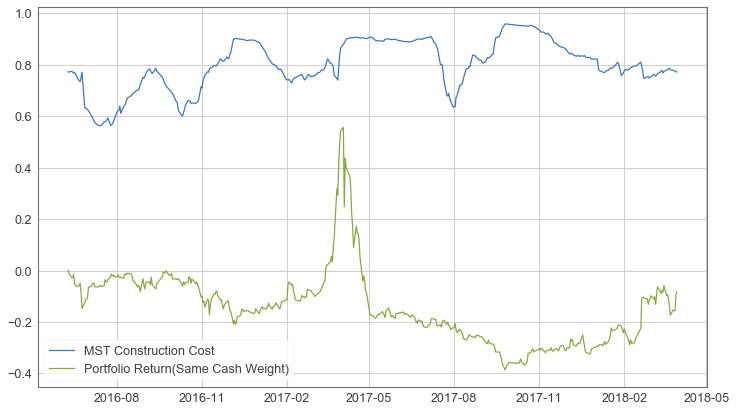

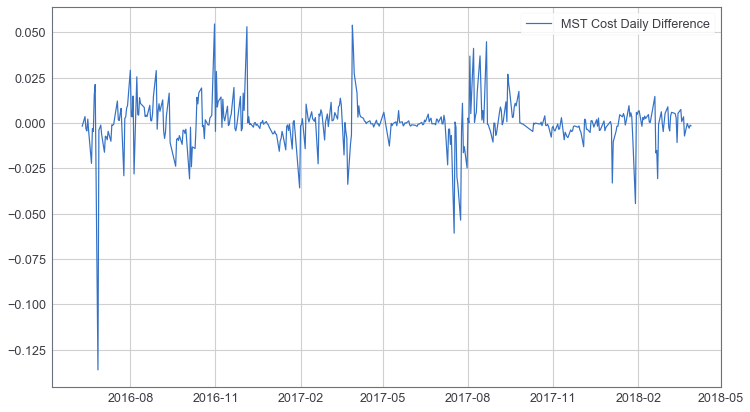

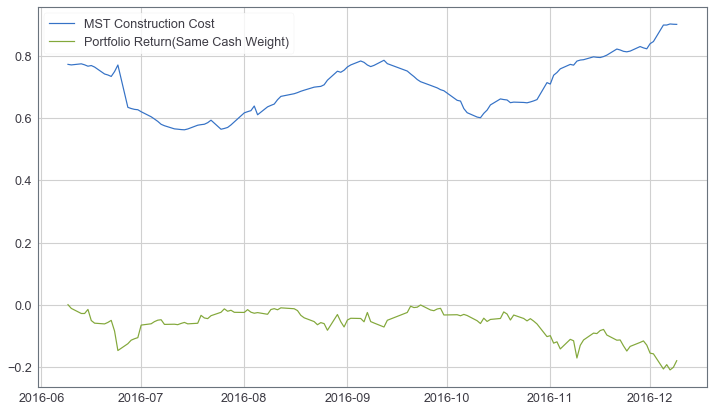

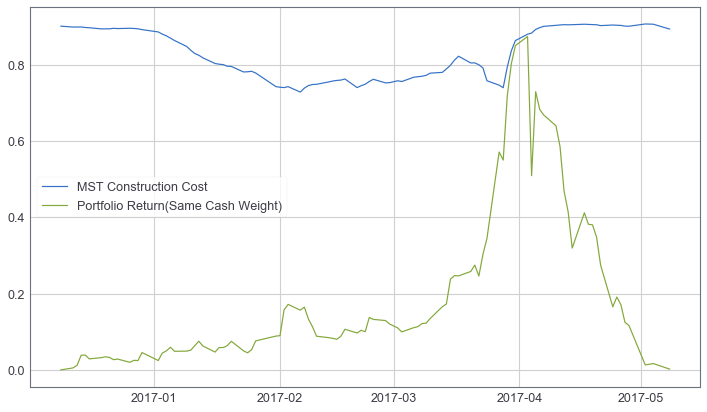

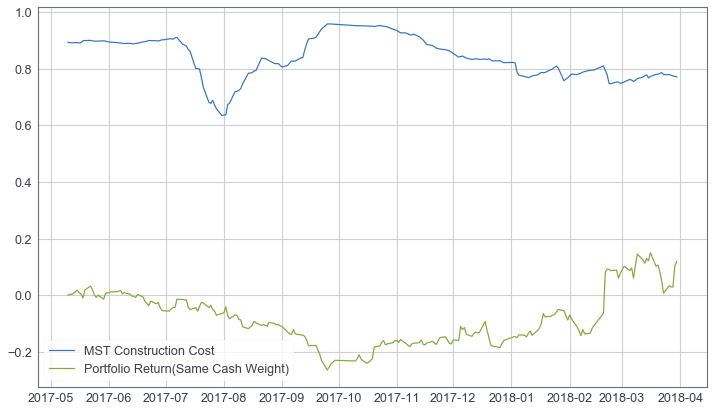

In [218]:
Ahn_1_network = construct_network(time_period, Ahn_1, df)

Date :  2017-02-09 00:00:00
Cost :  3.743723710809801


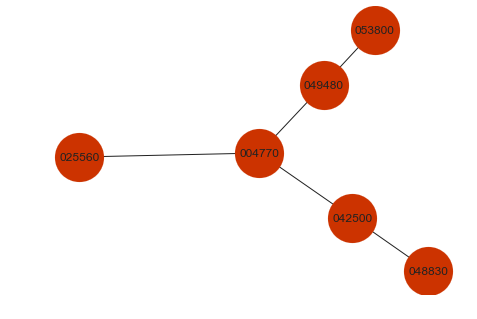

In [219]:
Ahn_1_network.draw_graph(datetime.datetime.strptime('2017-02-09','%Y-%m-%d'))

Date :  2017-03-09 00:00:00
Cost :  3.8638742563999338


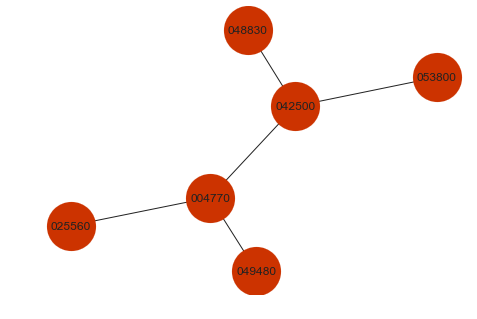

In [220]:
Ahn_1_network.draw_graph(datetime.datetime.strptime('2017-03-09','%Y-%m-%d'))

Date :  2017-04-09 00:00:00
Cost :  4.5052873856975655


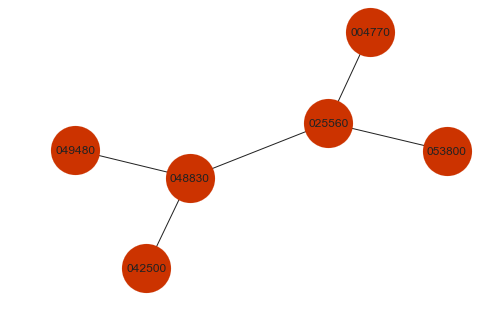

In [221]:
Ahn_1_network.draw_graph(datetime.datetime.strptime('2017-04-09','%Y-%m-%d'))

Date :  2017-05-09 00:00:00
Cost :  4.470983532509047


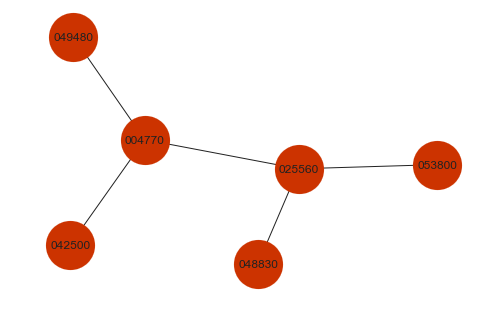

In [230]:
Ahn_1_network.draw_graph(datetime.datetime.strptime('2017-5-09','%Y-%m-%d'))

In [238]:
df = db.read_data('AH_DB', 'adjdailyohlcv',['date','code','close'], 
    conditions = {'date': "BETWEEN DATE '2016-01-01' AND DATE '2018-05-08'", 
                  'code':"in ('115500','102120','155660','065650','042110','096630','069730','119850','002140','035890','039560')"})

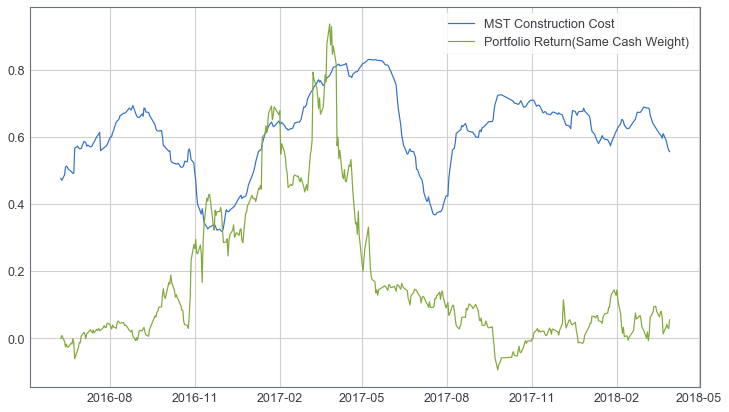

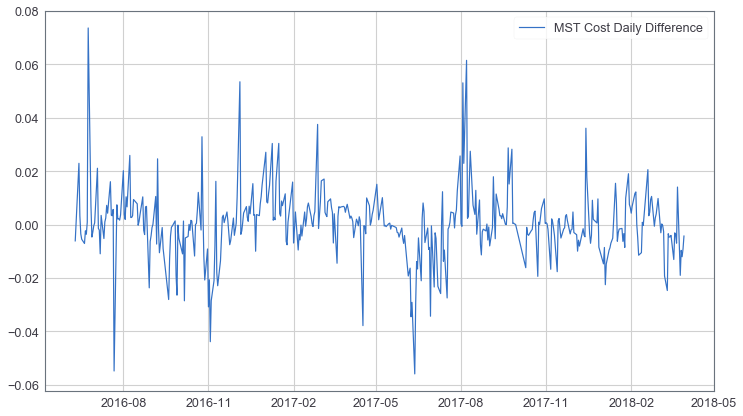

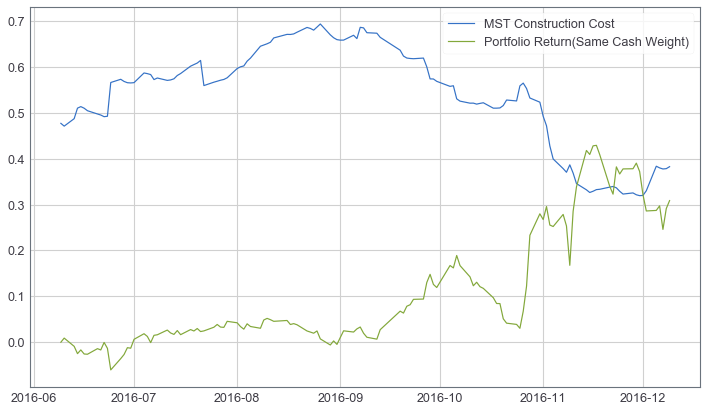

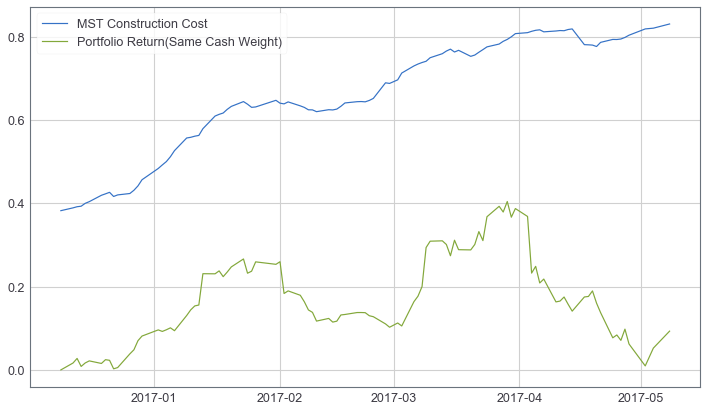

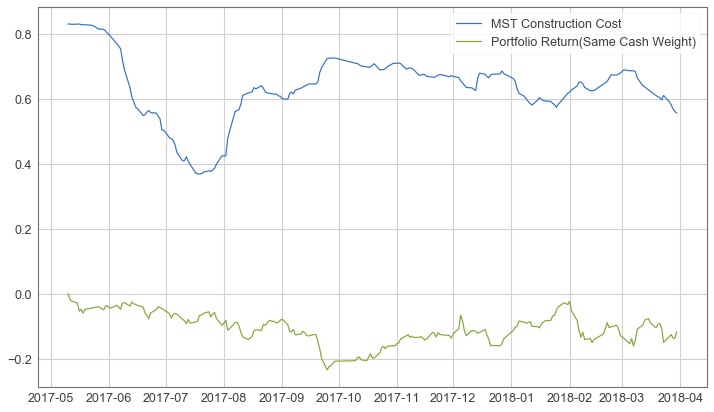

In [239]:
Moon_network = construct_network(time_period, Moon, df)

In [240]:
#안희정
Ahn_2

['224060', '003310', '013720', '088290', '054410', '046310', '036120']

In [1]:
df = db.read_data('AH_DB', 'adjdailyohlcv',['date','code','close'], 
    conditions = {'date': "BETWEEN DATE '2016-01-01' AND DATE '2018-05-08'", 
                  'code':"in ('224060', '003310', '013720', '088290', '054410', '046310', '036120')"})

NameError: name 'db' is not defined

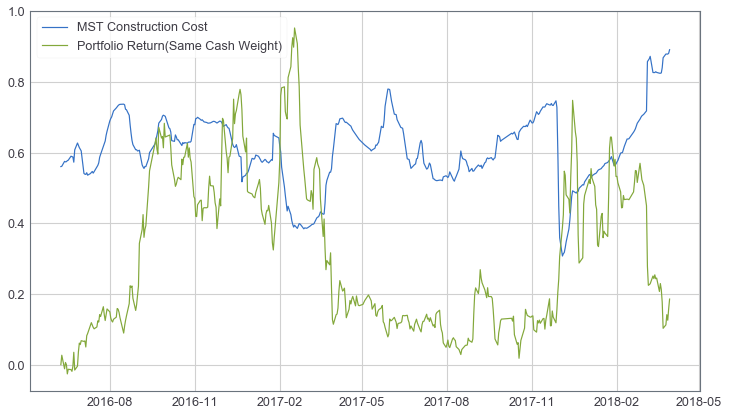

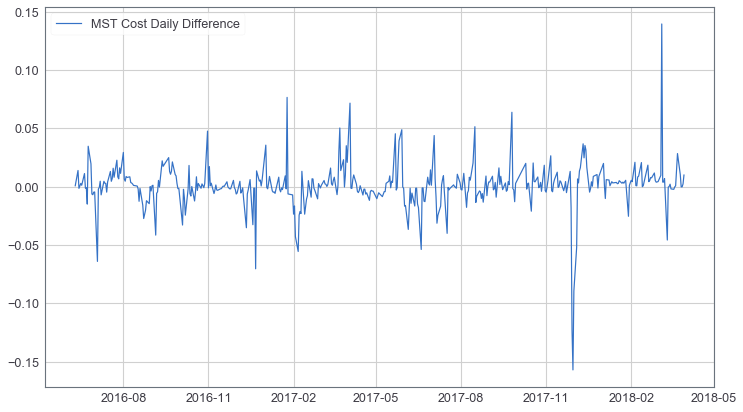

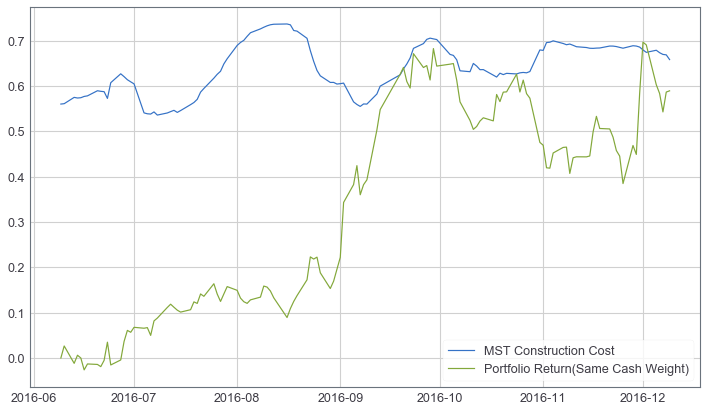

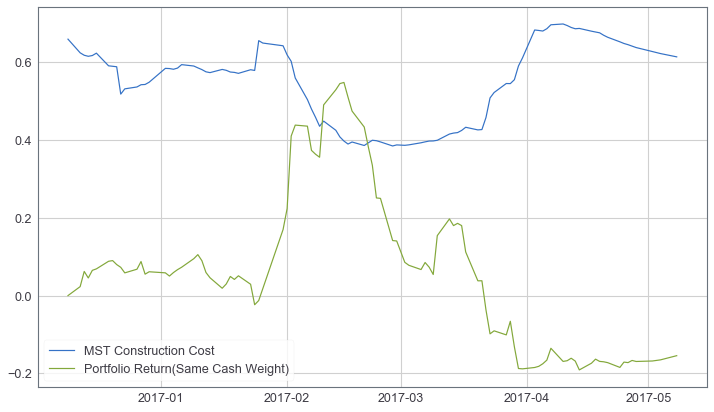

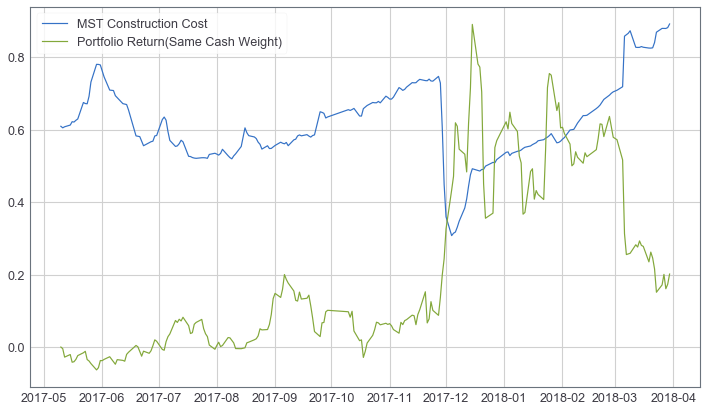

In [242]:
Ahn_2_network = construct_network(time_period, Ahn_2, df)

<img src = "https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/5bd5c8feb6d180302f33944d/de731b9e05c7c71c87f60a27aae636c5/image.png">

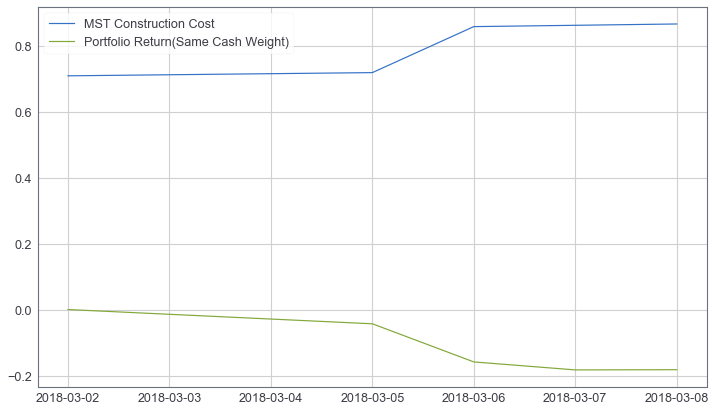

In [243]:
Ahn_2_network.plt_period(['2018-03-01','2018-03-08'])

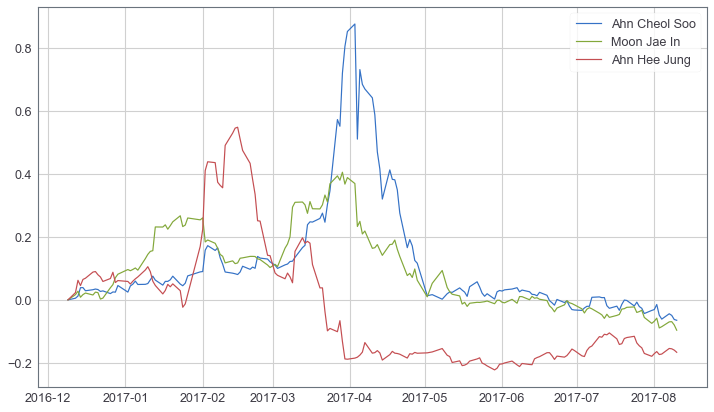

In [251]:
plt.figure(figsize=(12,7))

plt.plot(Ahn_1_network.get_portfolio(('2016-12-09','2017-08-10')) - 1, label='Ahn Cheol Soo')
plt.plot(Moon_network.get_portfolio(('2016-12-09','2017-08-10')) - 1, label='Moon Jae In')
plt.plot(Ahn_2_network.get_portfolio(('2016-12-09','2017-08-10')) - 1, label='Ahn Hee Jung')

plt.legend()
plt.show()

### Problems

후행성 관련 문제
- 데이터가 1일 단위 인데 현재 분석에서는 당일날 주가와 매칭이 되어있음
- 검색어 데이터의 집계 시간은 당일 24시 까지 이므로 주식시장의 장 마감 시간인 15:30 분보다 늦은 검색어 들도 집계됨

휴장일 동안의 검색어 데이터 처리
- 현재는 그냥 무시하는 방식을 사용했는데 보완이 필요 할 것 같습니다.
    - 휴장일 동안 누적하여 반영
    - 휴장일 동안의 평균값을 반영
    

### Further Study

후행성 관련 문제
- Domain Shift 를 하여 분석을 진행 
- 종가(Close) 말고 시가(Open) 로 분석해보기

세밀한 단위(시간/분..)의 데이터를 구할 수 있다면 주가와 선/후행 관계를 엄밀하게 따져 볼 수 있을것

DTW(Dynamic Time Warping), PIP(Perceptually Important Point) 등의 알고리즘 적용 해보기